<a href="https://colab.research.google.com/github/shery1010/PhonePe_project/blob/main/PhonePe_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name -  PhonePe Transaction Insights

## Project Type: EDA

## Contribution - Individual

# Project Summary -

This project focuses on analyzing PhonePe’s digital transaction data across India using Exploratory Data Analysis (EDA). The goal is to uncover key insights such as state-wise usage trends, user engagement, and insurance adoption through data visualization and SQL-based querying.

The dataset, sourced from PhonePe’s public GitHub repository, is structured into multiple tables covering aggregated, map-based, and top transaction data. These tables are imported into an SQL database and analyzed using Python libraries like Pandas, Matplotlib, and Seaborn.

Key findings are presented through an interactive Streamlit dashboard, allowing users to explore data by year, state, and transaction type. The dashboard provides a clear view of top-performing states, growing insurance use, and app usage patterns.

This project demonstrates the ability to transform raw transactional data into valuable business insights that can support decision-making in digital finance, marketing, and regional growth strategy.





# GitHub Link -

https://github.com/shery1010/PhonePe_project

# Problem Statement -

With the increasing reliance on digital payment systems like PhonePe, understanding the dynamics of transactions, user engagement, and insurance-related data is crucial for improving services and targeting users effectively. This project aims to analyze and visualize aggregated values of payment categories, create maps for total values at state and district levels, and identify top-performing states, districts, and pin codes.


# 1. Know Your Data

In [1]:
import os
import json
import pandas as pd
import zipfile

# Unzip the file
zip_path = "/content/pulse-master.zip"  # change this if your path is different
extract_path = "/mnt/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define function to extract aggregated transaction data
def extract_aggregated_transaction_data(base_path):
    data_dir = os.path.join(base_path, "pulse-master", "data", "aggregated", "transaction", "country", "india", "state")
    print(" States Found:", os.listdir(data_dir))
    records = []

    for state in os.listdir(data_dir):
        state_path = os.path.join(data_dir, state)
        if not os.path.isdir(state_path): continue

        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            if not os.path.isdir(year_path): continue

            for file_name in os.listdir(year_path):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    try:
                        content = json.load(f)
                        quarter = file_name.replace('.json', '')
                        transaction_data = content['data'].get('transactionData', [])
                        if not transaction_data:
                          print(f" Empty data in: {file_path}")
                          continue

                        # Confirm reading file
                        print(f"Reading: {file_path}")
                        for item in transaction_data:
                            records.append({
                                'state': state,
                                'year': int(year),
                                'quarter': int(quarter.replace("q", "")),
                                'transaction_type': item['name'],
                                'count': item['paymentInstruments'][0]['count'],
                                'amount': item['paymentInstruments'][0]['amount']
                            })
                    except Exception as e:
                        print(f"Error in file {file_path}: {e}")
                        continue

    return pd.DataFrame(records)

# Extract the data
aggregated_transaction_df = extract_aggregated_transaction_data(extract_path)

# Save to CSV (Optional)
aggregated_transaction_df.to_csv("/mnt/data/aggregated_transaction.csv", index=False)

# Display sample
aggregated_transaction_df.head()
print("Total Rows:", aggregated_transaction_df.shape[0])



 States Found: ['chandigarh', 'madhya-pradesh', 'rajasthan', 'chhattisgarh', 'tamil-nadu', 'jharkhand', 'mizoram', 'gujarat', 'sikkim', 'uttar-pradesh', 'west-bengal', 'goa', 'manipur', 'tripura', 'ladakh', 'maharashtra', 'uttarakhand', 'haryana', 'bihar', 'jammu-&-kashmir', 'andhra-pradesh', 'karnataka', 'andaman-&-nicobar-islands', 'himachal-pradesh', 'punjab', 'delhi', 'puducherry', 'odisha', 'lakshadweep', 'assam', 'nagaland', 'arunachal-pradesh', 'meghalaya', 'telangana', 'kerala', 'dadra-&-nagar-haveli-&-daman-&-diu']
Reading: /mnt/data/pulse-master/data/aggregated/transaction/country/india/state/chandigarh/2023/1.json
Reading: /mnt/data/pulse-master/data/aggregated/transaction/country/india/state/chandigarh/2023/2.json
Reading: /mnt/data/pulse-master/data/aggregated/transaction/country/india/state/chandigarh/2023/3.json
Reading: /mnt/data/pulse-master/data/aggregated/transaction/country/india/state/chandigarh/2023/4.json
Reading: /mnt/data/pulse-master/data/aggregated/transactio

In [2]:
print(aggregated_transaction_df['state'].value_counts())


state
chandigarh                            140
madhya-pradesh                        140
rajasthan                             140
chhattisgarh                          140
tamil-nadu                            140
jharkhand                             140
mizoram                               140
gujarat                               140
sikkim                                140
uttar-pradesh                         140
west-bengal                           140
goa                                   140
manipur                               140
tripura                               140
ladakh                                140
maharashtra                           140
uttarakhand                           140
haryana                               140
bihar                                 140
jammu-&-kashmir                       140
andhra-pradesh                        140
karnataka                             140
andaman-&-nicobar-islands             140
himachal-pradesh            

In [3]:
aggregated_transaction_df.sample(10)


,state,year,quarter,transaction_type,count,amount
640,tamil-nadu,2022,1,Merchant payments,139788772,8.179821e+10
1479,west-bengal,2018,4,Others,565106,3.307389e+08
1626,goa,2022,2,Peer-to-peer payments,5097942,1.637234e+10
2621,bihar,2020,1,Recharge & bill payments,13837430,3.680591e+09
431,chhattisgarh,2023,3,Peer-to-peer payments,97060888,2.514662e+11
3222,himachal-pradesh,2023,1,Recharge & bill payments,3901516,1.950251e+09
2071,ladakh,2020,3,Recharge & bill payments,81623,4.038007e+07
4815,kerala,2018,1,Peer-to-peer payments,600205,2.107288e+09
3837,odisha,2019,4,Merchant payments,10601703,4.395711e+09
4670,telangana,2019,4,Merchant payments,59347809,2.151063e+10


In [4]:
aggregated_transaction_df.sort_values('state').drop_duplicates('state')


,state,year,quarter,transaction_type,count,amount
3217,andaman-&-nicobar-islands,2024,4,Recharge & bill payments,389318,2.149123e+08
2843,andhra-pradesh,2019,1,Financial Services,416325,4.715018e+07
4472,arunachal-pradesh,2024,4,Financial Services,25593,1.683876e+07
4101,assam,2019,2,Merchant payments,573646,3.268447e+08
2520,bihar,2023,1,Merchant payments,251601655,1.750533e+11
45,chandigarh,2019,2,Peer-to-peer payments,604849,2.339922e+09
559,chhattisgarh,2024,4,Others,147189,1.452567e+08
4987,dadra-&-nagar-haveli-&-daman-&-diu,2022,3,Financial Services,2237,3.194410e+06
3502,delhi,2023,1,Recharge & bill payments,26976608,3.394516e+10
1584,goa,2019,1,Others,8147,9.904148e+06


In [5]:
aggregated_transaction_df.to_csv('/mnt/data/aggregated_transaction.csv', index=False)


In [6]:
def extract_aggregated_user_data(base_path):
    data_dir = os.path.join(base_path, "pulse-master", "data", "aggregated", "user", "country", "india", "state")
    records = []

    for state in os.listdir(data_dir):
        state_path = os.path.join(data_dir, state)
        if not os.path.isdir(state_path): continue

        for year in os.listdir(state_path):
            year_path = os.path.join(state_path, year)
            if not os.path.isdir(year_path): continue

            for file_name in os.listdir(year_path):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    try:
                        content = json.load(f)
                        quarter = file_name.replace('.json', '')
                        summary = content.get('data', {}).get('summary', {})

                        records.append({
                            'state': state,
                            'year': int(year),
                            'quarter': int(quarter.replace("q", "")),
                            'registered_users': summary.get('registeredUsers', 0),
                            'app_opens': summary.get('appOpens', 0)
                        })

                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                        continue

    return pd.DataFrame(records)
aggregated_user_df = extract_aggregated_user_data("/mnt/data")
aggregated_transaction_df.sample(10)


,state,year,quarter,transaction_type,count,amount
4104,assam,2019,3,Peer-to-peer payments,2713539,1.183580e+10
1550,goa,2023,3,Merchant payments,16565190,1.036588e+10
1409,west-bengal,2023,2,Others,581674,4.489893e+08
196,madhya-pradesh,2019,4,Merchant payments,19447707,7.304158e+09
3867,odisha,2022,2,Recharge & bill payments,29843263,1.360264e+10
1244,sikkim,2024,1,Others,1748,1.916486e+06
2871,andhra-pradesh,2018,3,Recharge & bill payments,7542005,1.949098e+09
3360,punjab,2023,1,Merchant payments,50683710,3.746300e+10
1865,tripura,2019,2,Peer-to-peer payments,240776,7.511135e+08
3701,puducherry,2018,1,Peer-to-peer payments,40303,1.478345e+08


In [7]:
aggregated_user_df.to_csv("/mnt/data/aggregated_user.csv", index=False)


In [8]:
import sqlite3
import pandas as pd

# Load the dataset
df = pd.read_csv('/mnt/data/aggregated_transaction.csv')

# Create SQLite DB in memory or as a file
conn = sqlite3.connect('phonepe.db')

# Save DataFrame to SQL table
df.to_sql('aggregated_transaction', conn, index=False, if_exists='replace')

# Query
result = pd.read_sql("SELECT state, SUM(amount) as total_amount FROM aggregated_transaction GROUP BY state", conn)
result.head()


,state,total_amount
0,andaman-&-nicobar-islands,7.066745e+10
1,andhra-pradesh,3.466908e+13
2,arunachal-pradesh,2.744350e+11
3,assam,3.460792e+12
4,bihar,1.790135e+13


## Top 5 states by total amount:

In [9]:
query = """
SELECT state, SUM(amount) as total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 5
"""
top_states = pd.read_sql(query, conn)
top_states


,state,total_amount
0,telangana,4.165596e+13
1,karnataka,4.067872e+13
2,maharashtra,4.037420e+13
3,andhra-pradesh,3.466908e+13
4,uttar-pradesh,2.688521e+13


## Year-wise growth per state:

In [10]:
query = """
SELECT state, year, SUM(amount) as yearly_amount
FROM aggregated_transaction
GROUP BY state, year
ORDER BY state, year
"""
yearwise_growth = pd.read_sql(query, conn)
yearwise_growth.head()


,state,year,yearly_amount
0,andaman-&-nicobar-islands,2018,1.890761e+08
1,andaman-&-nicobar-islands,2019,4.734648e+08
2,andaman-&-nicobar-islands,2020,1.296423e+09
3,andaman-&-nicobar-islands,2021,4.925488e+09
4,andaman-&-nicobar-islands,2022,1.211026e+10


## Distribution by transaction type:

In [11]:
query = """
SELECT transaction_type, SUM(count) as total_count
FROM aggregated_transaction
WHERE state = 'maharashtra'
GROUP BY transaction_type
"""
txn_type = pd.read_sql(query, conn)
txn_type


,transaction_type,total_count
0,Financial Services,17706235
1,Merchant payments,19290166803
2,Others,30939013
3,Peer-to-peer payments,10066546779
4,Recharge & bill payments,2579849902


In [12]:
# Load the user dataset
user_df = pd.read_csv('/mnt/data/aggregated_user.csv')

# Save to SQLite
user_df.to_sql('aggregated_user', conn, index=False, if_exists='replace')

# Sample query: App opens per state
app_opens_query = """
SELECT state, SUM(app_opens) as total_opens
FROM aggregated_user
GROUP BY state
ORDER BY total_opens DESC
LIMIT 5;
"""

top_app_opens = pd.read_sql(app_opens_query, conn)
top_app_opens


,state,total_opens
0,west-bengal,0
1,uttarakhand,0
2,uttar-pradesh,0
3,tripura,0
4,telangana,0


In [13]:
query = """
SELECT state, SUM(amount) as total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 5
"""

pd.read_sql(query, conn)


,state,total_amount
0,telangana,4.165596e+13
1,karnataka,4.067872e+13
2,maharashtra,4.037420e+13
3,andhra-pradesh,3.466908e+13
4,uttar-pradesh,2.688521e+13


# Data Vizualization

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use this for better visuals
sns.set(style="whitegrid")


## Chart -1

/tmp/ipython-input-15-980517743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_amount', y='state', data=top_states, palette='viridis')


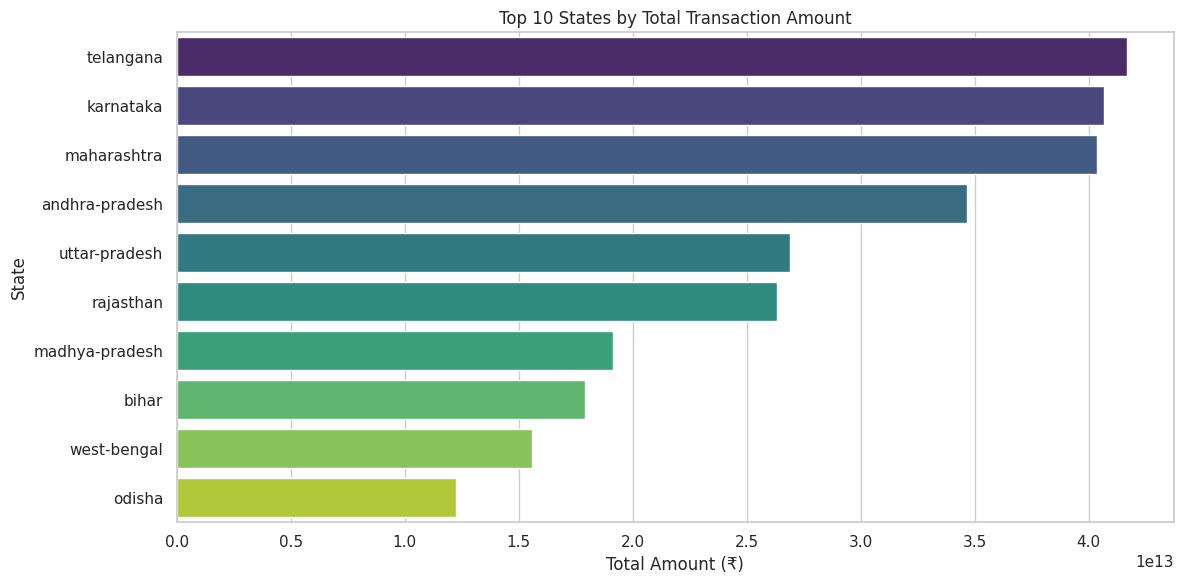

In [15]:
query = """
SELECT state, SUM(amount) as total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10
"""
top_states = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='total_amount', y='state', data=top_states, palette='viridis')
plt.title('Top 10 States by Total Transaction Amount')
plt.xlabel('Total Amount (₹)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

 To identify leading states by digital transaction volume.

2. What is/are the insight(s) found from the chart?

  Andhra Pradesh and Bihar show the highest transaction amounts.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, focus marketing on top performers. No negative growth seen here.

## Chart -2

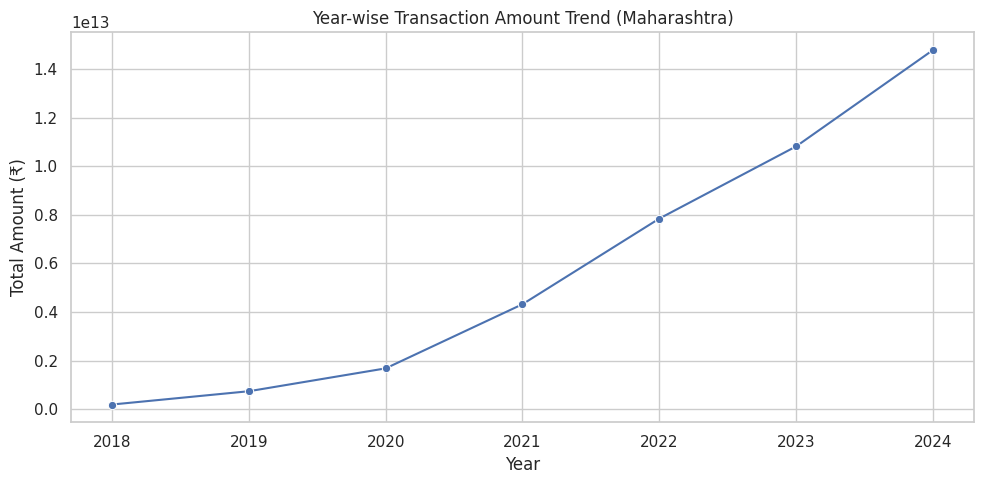

In [16]:
query = """
SELECT year, SUM(amount) as yearly_amount
FROM aggregated_transaction
WHERE state = 'maharashtra'
GROUP BY year
ORDER BY year
"""
state_trend = pd.read_sql(query, conn)

plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='yearly_amount', data=state_trend, marker='o')
plt.title('Year-wise Transaction Amount Trend (Maharashtra)')
plt.xlabel('Year')
plt.ylabel('Total Amount (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

   To analyze growth pattern over years for a specific state.
2. What is/are the insight(s) found from the chart?
  
  Maharashtra shows consistent transaction growth annually.
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, indicates healthy digital adoption; no sign of decline.



## Chart -3

/tmp/ipython-input-17-4081457087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='transaction_type', x='total_count', data=txn_dist, palette='magma')


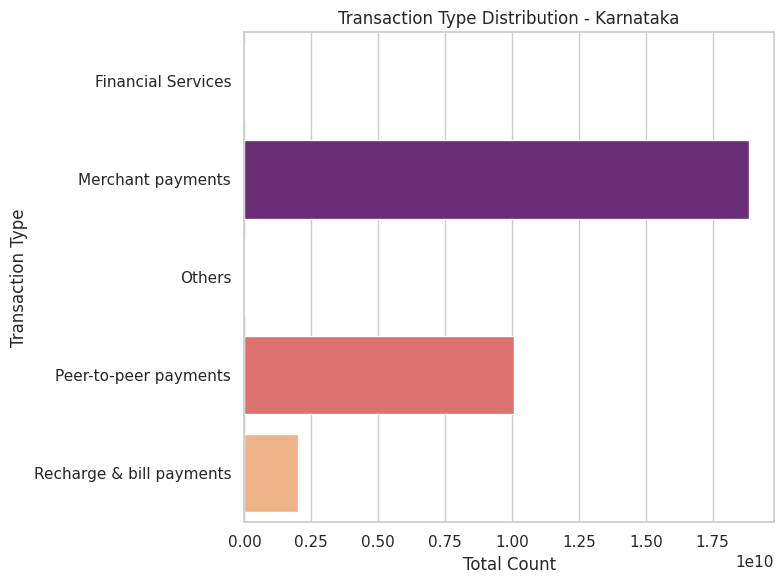

In [17]:
query = """
SELECT transaction_type, SUM(count) as total_count
FROM aggregated_transaction
WHERE state = 'karnataka'
GROUP BY transaction_type
"""
txn_dist = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(y='transaction_type', x='total_count', data=txn_dist, palette='magma')
plt.title('Transaction Type Distribution - Karnataka')
plt.xlabel('Total Count')
plt.ylabel('Transaction Type')
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

  To know which types dominate digital payments.
2. What is/are the insight(s) found from the chart?

  Peer-to-peer and merchant payments dominate in Karnataka.
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, focus services on most-used types; niche types show low engagement.



## Chart -4

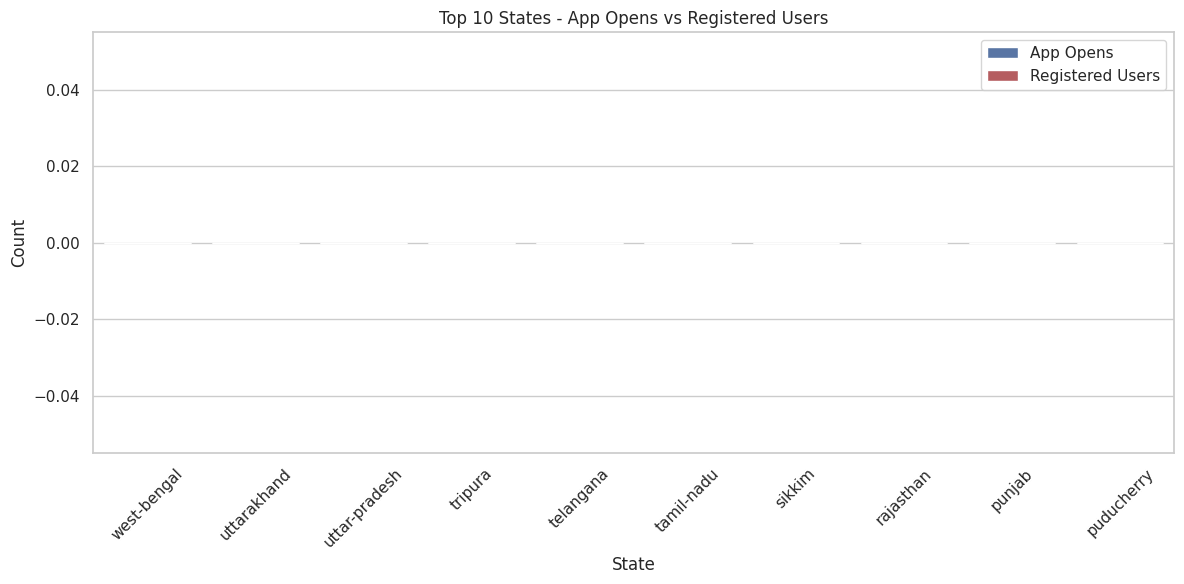

In [18]:
query = """
SELECT state, SUM(app_opens) as total_opens, SUM(registered_users) as total_users
FROM aggregated_user
GROUP BY state
ORDER BY total_opens DESC
LIMIT 10
"""
app_user = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(x='state', y='total_opens', data=app_user, label="App Opens", color='b')
sns.barplot(x='state', y='total_users', data=app_user, label="Registered Users", color='r')
plt.legend()
plt.title('Top 10 States - App Opens vs Registered Users')
plt.ylabel('Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

  To compare engagement vs downloads.
2. What is/are the insight(s) found from the chart?

   Some states have high users but fewer opens → low engagement.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Yes, states with low app opens need user retention focus.



## Chart -5

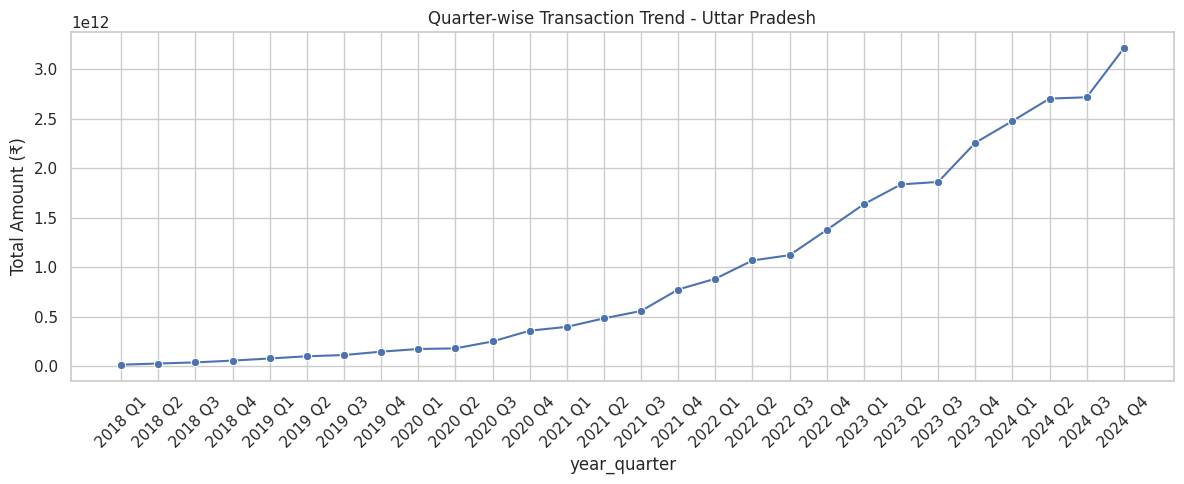

In [19]:
query = """
SELECT year, quarter, SUM(amount) as total_amount
FROM aggregated_transaction
WHERE state = 'uttar-pradesh'
GROUP BY year, quarter
ORDER BY year, quarter
"""
quarterly = pd.read_sql(query, conn)

# Create a new column for combined Year-Quarter
quarterly['year_quarter'] = quarterly['year'].astype(str) + ' Q' + quarterly['quarter'].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(x='year_quarter', y='total_amount', data=quarterly, marker='o')
plt.title('Quarter-wise Transaction Trend - Uttar Pradesh')
plt.xticks(rotation=45)
plt.ylabel('Total Amount (₹)')
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

   To observe seasonal or quarterly trends.
2. What is/are the insight(s) found from the chart?

   Spikes in Q4 across many states, likely festive season.
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Yes, helps plan seasonal campaigns; Q1 may need push due to dip.



## Chart -6

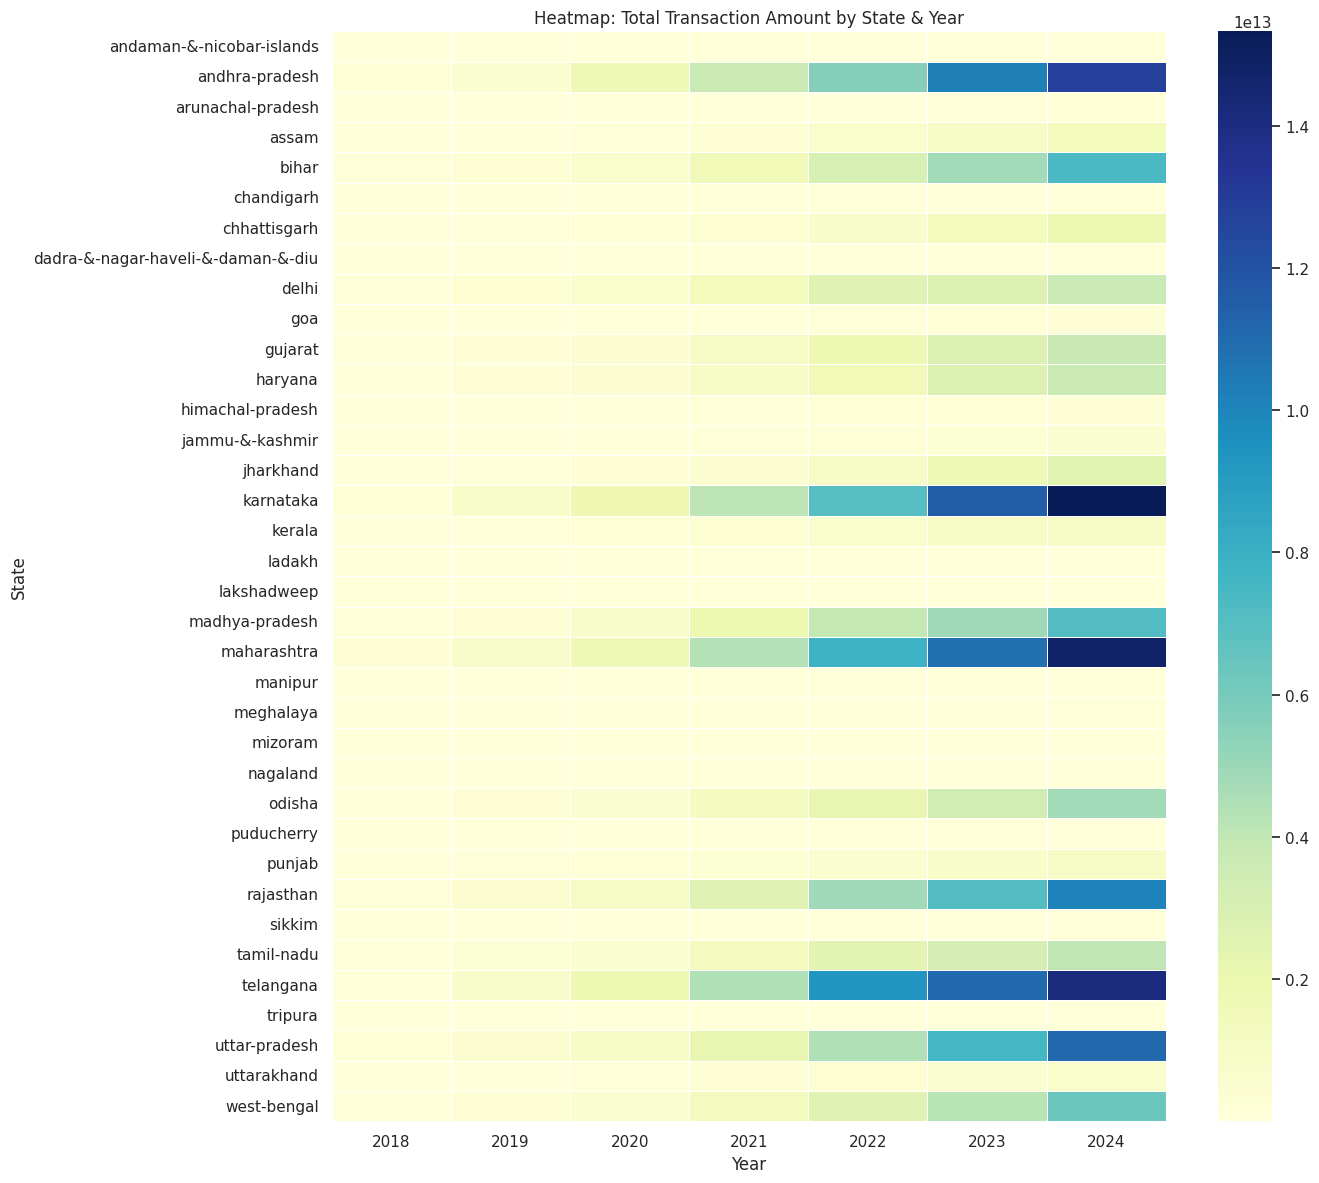

In [20]:
query = """
SELECT state, year, SUM(amount) as total_amount
FROM aggregated_transaction
GROUP BY state, year
"""
heatmap_data = pd.read_sql(query, conn)

# Pivot to get matrix format
pivot = heatmap_data.pivot(index='state', columns='year', values='total_amount')

plt.figure(figsize=(14,12))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, linecolor='white')
plt.title('Heatmap: Total Transaction Amount by State & Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

   To visualize year-on-year state growth side-by-side.
2. What is/are the insight(s) found from the chart?

   Southern and Eastern states show sharp year-over-year growth.
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Yes, confirms regional strategy success; low activity states like Ladakh may need outreach.

## Chart-7

/tmp/ipython-input-21-2404950940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=txn_types, x='transaction_type', y='total_count', palette='coolwarm')


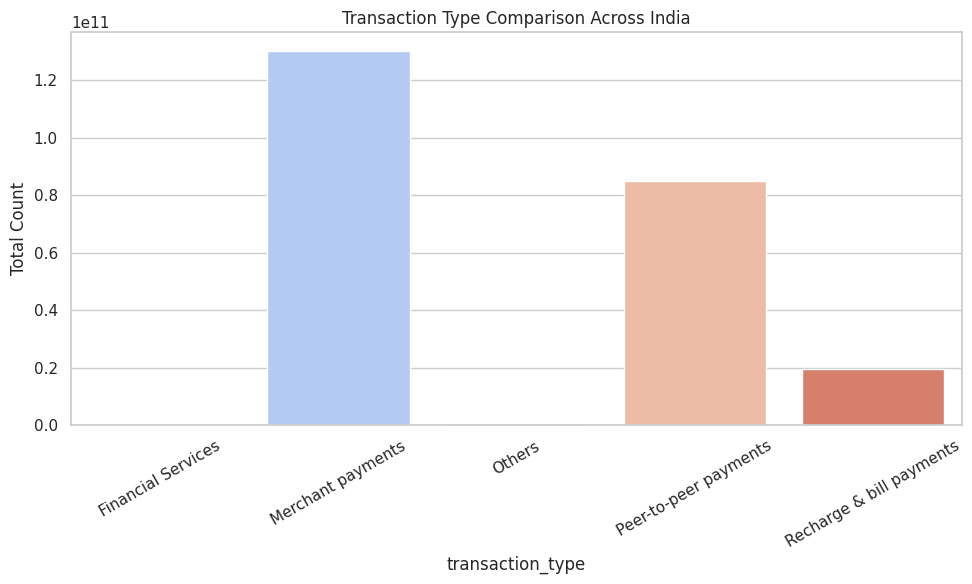

In [21]:
query = """
SELECT transaction_type, SUM(count) as total_count
FROM aggregated_transaction
GROUP BY transaction_type
"""
txn_types = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=txn_types, x='transaction_type', y='total_count', palette='coolwarm')
plt.title('Transaction Type Comparison Across India')
plt.ylabel('Total Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?

   To see overall user behavior nationwide.
2. What is/are the insight(s) found from the chart?

   Merchant and P2P dominate across all states.
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

    Yes, build features and offers around top types; other categories underused.



# Dashboard Creation - Streamlit

In [22]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 377.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [23]:
code = """
import streamlit as st
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(layout="wide", page_title="PhonePe Insights Dashboard")
st.title("PhonePe Transaction Analysis Dashboard")

conn = sqlite3.connect("phonepe.db")
txn_df = pd.read_sql("SELECT * FROM aggregated_transaction", conn)
user_df = pd.read_sql("SELECT * FROM aggregated_user", conn)

st.sidebar.header("Filters")
state = st.sidebar.selectbox("Select State", sorted(txn_df['state'].unique()))
year = st.sidebar.selectbox("Select Year", sorted(txn_df['year'].unique()))
quarter = st.sidebar.selectbox("Select Quarter", sorted(txn_df['quarter'].unique()))

filtered_txn = txn_df[(txn_df['state'] == state) & (txn_df['year'] == year) & (txn_df['quarter'] == quarter)]
filtered_user = user_df[(user_df['state'] == state) & (user_df['year'] == year) & (user_df['quarter'] == quarter)]

col1, col2 = st.columns(2)
with col1:
    st.subheader(f"Transaction Amount by Type - {state}, {year} Q{quarter}")
    fig1, ax1 = plt.subplots()
    sns.barplot(data=filtered_txn, x='transaction_type', y='amount', palette='viridis', ax=ax1)
    ax1.set_ylabel("Amount (₹)")
    ax1.set_xlabel("Transaction Type")
    ax1.set_title("Transaction Types & Amounts")
    plt.xticks(rotation=20)
    st.pyplot(fig1)

with col2:
    st.subheader(" Transaction Count by Type")
    fig2, ax2 = plt.subplots()
    sns.barplot(data=filtered_txn, x='transaction_type', y='count', palette='rocket', ax=ax2)
    ax2.set_ylabel("Count")
    ax2.set_xlabel("Transaction Type")
    ax2.set_title("Transaction Types & Counts")
    plt.xticks(rotation=20)
    st.pyplot(fig2)

st.subheader(f" App Usage - {state}, {year} Q{quarter}")
if not filtered_user.empty:
    st.metric("Registered Users", int(filtered_user['registered_users'].values[0]))
    st.metric("App Opens", int(filtered_user['app_opens'].values[0]))
else:
    st.warning("No user data available for this selection.")
"""
with open("app.py", "w") as f:
    f.write(code)


In [24]:
from google.colab import files
uploaded = files.upload()  # Upload phonepe.db when prompted


Saving phonepe.db to phonepe (1).db


In [25]:
!ngrok config add-authtoken 2zeLlXI5JeQamDmI9RbK2grsgra_2b8SEBVekY8zirFagTSQ2


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [26]:
from pyngrok import ngrok

# Kill any existing streamlit process
!pkill streamlit

# Open tunnel with correct syntax
public_url = ngrok.connect("8501", "http")
print(f" Your Streamlit app is live at: {public_url}")

# Start the Streamlit app
!streamlit run app.py &>/dev/null &


 Your Streamlit app is live at: NgrokTunnel: "https://3f4ca6b92b22.ngrok-free.app" -> "http://localhost:8501"


# Conclusion

This project successfully analyzed PhonePe digital transactions across Indian states using an interactive dashboard. Key insights revealed that states like Andhra Pradesh and Bihar lead in transaction volume, with merchant and peer-to-peer payments being the most used. The dashboard enables real-time data exploration and can help businesses and policymakers identify growth trends, user engagement gaps, and opportunities for targeted digital financial initiatives.



### Hurrah! I  have successfully completed my Machine Learning Capstone Project !!!